<a href="https://colab.research.google.com/github/Katonokatono/Suicide/blob/model/Suicide_Detection_Tweets_Classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Suicide Detection Tweet Classification Machine Learning Models.
We are going to use different machine learning models to classify tweets that contain suicide ideation from data scraped from Twitter.
The models that are used include:
 - Kneighbours Classifier 
 - Naive Bayes (Gaussian, Multinomial and Bernoulli)
 - Logistic Regression
 - Support Vector Machines

The recall metric will be used to check the models' performance


##Kneighbors classifier

In [1]:
import pandas as pd

train_df = pd.read_csv('/content/balanced_data.csv')
test_df = pd.read_csv('/content/VAlid dataset.csv')
train_df['class']=train_df['label']
test_df['class']=test_df['label']

In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_df['class'] = le.fit_transform(train_df['class'])

In [3]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
# Input: "cleaned tweets"
# Target: "class"

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_df["clean_text"],
                                                  train_df["class"],
                                                  test_size=0.05,
                                                  shuffle=True,
                                                  stratify =train_df["class"] )
#import necessary libraries
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
#import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True, )
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
test_df.head()


,Unnamed: 0,Unnamed: 0.1,tweet,friends_count,followers_count,statuses_count,created_at,retweet_count,label,town,clean_text,class
0,3599,93,Ugly and depressed,1462,1965,20109,10-09-21 10:48,0,depression,nairobi,ugly depressed,depression
1,1485,386,@GhettoRadio895 Maji @MajimajiKenya first of a...,6354,5774,59341,2021-09-10 05:17:39,0,general tweet,athi river,ghettoradio maji majimajikenya first thank god...,general tweet
2,2875,144,@F1 Lewis Thanks be to God you survived this s...,133,49,840,9/12/2021 15:49,0,general tweet,nairobi,f lewis thanks god survive suicide move vax re...,general tweet
3,283,297,"@Iwtpoison You are strong, you are resilient! ...",138,139,263,09/09/2021 22:51,0,general tweet,nairobi,iwtpoison strong resilient ditch anxiety howev...,general tweet
4,2971,240,Dr. Eric Njuguna – Psychiatrist: Spiritual lea...,158,3481082,602473,9/10/2021 18:54,3,general tweet,nairobi,dr eric njuguna psychiatrist spiritual leader ...,general tweet


In [5]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['clean_text'])
tokenizer.fit_on_texts(test_df['clean_text'])

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [6]:

# split the data into labels and features

X = X_train_vectors_tfidf
y = train_df['class']


#Defining the hyper parameters for the Knearest Neighbors Classifier
leaf_size = list(range(7,20))
n_neighbors = list(range(3,10))
p = [1,2]
metric = ['manhattan', 'euclidean', 'minkowski']
#Creating a dictionary with the hyperparameters
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p=p,metric = metric)

#I used GridSearch to look for the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

clf = GridSearchCV(classifier, hyperparameters,cv=10)
clf = clf.fit(X_train_vectors_tfidf, y_train)

print('\n')

print(clf.best_params_)
print('\n')
#Creating a better model based on the parameters given to us by the gridsearch
modelone = KNeighborsClassifier(leaf_size = clf.best_params_['leaf_size'], n_neighbors = clf.best_params_['n_neighbors'], p = clf.best_params_['p'], metric = clf.best_params_['metric']).fit(X_train_vectors_tfidf, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_val_vectors_tfidf)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---

from sklearn import metrics
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix,recall_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_val, y_pred))
print('The recall of the model is ',metrics.recall_score(y_val, y_pred, average='micro'))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_val, y_pred))
print('\n', 'Classification report')
print(classification_report(y_val, y_pred))



{'leaf_size': 7, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1}




      Actual  Predicted
1910       1          1
209        6          6
1741       0          0
1626       0          0
1040       4          4
...      ...        ...
1130       3          4
977        4          4
49         6          6
259        6          6
2246       2          2

[125 rows x 2 columns]


           Actual   Predicted
count  125.000000  125.000000
mean     2.984000    2.992000
std      2.007984    2.119403
min      0.000000    0.000000
25%      1.000000    1.000000
50%      3.000000    3.000000
75%      5.000000    5.000000
max      6.000000    6.000000
Mean Absolute Error: 0.776
Mean Squared Error: 2.168
Root Mean Squared Error: 1.472412985544477
The accuracy of the model is  0.664
The recall of the model is  0.664

 Confusion matrix
[[14  0  2  0  2  0  0]
 [ 3  5  2  2  3  2  1]
 [ 5  0 12  0  1  0  0]
 [ 5  2  2  4  4  0  1]
 [ 0  1  0  0 17  0  0]
 [ 0  0  1  2  0 14  0]
 [ 0  0  1  0  

In [7]:
#define X variable for fitting of the new model
test_df

X_val = test_df['clean_text']

In [8]:
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) 

#fit the tfidf model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible

# predict using the test dataset
y_pred = modelone.predict(X_val_vectors_tfidf)
y_pred = le.inverse_transform(y_pred)
#Adding the predicted values to our dataset
test_df['class'] = y_pred


In [9]:
# #Lets save our new dataset with class names

# test_df.to_csv('/content/drive/MyDrive/Module 2 groupwork Datasets/Test df with classes KNNclassifier.csv')

# Naive Bayes

In [10]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
# Input: "cleaned tweets"
# Target: "class"

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_df["clean_text"],
                                                  train_df["class"],
                                                  test_size=0.05,
                                                  shuffle=True,
                                                  stratify =train_df["class"] )
#import necessary libraries
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
#import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True, )
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Gaussian NB

In [11]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Training and fitting the multinomial model
gausnb = GaussianNB()
gausnb.fit(X_train_vectors_tfidf.toarray(),y_train)
y_pred = gausnb.predict(X_val_vectors_tfidf.toarray())


#Checking performance our model with performance metrics.

comparison_frame = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_val, y_pred))
print('The recall of the model is ',metrics.recall_score(y_val, y_pred, average='micro'))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_val, y_pred))
print('\n', 'Classification report')
print(classification_report(y_val, y_pred))



      Actual  Predicted
1390       3          0
599        5          5
2265       2          2
928        4          4
1          6          6
...      ...        ...
893        4          4
718        4          4
1478       0          2
1392       3          3
1482       0          4

[125 rows x 2 columns]


           Actual   Predicted
count  125.000000  125.000000
mean     3.000000    3.424000
std      2.016065    2.001064
min      0.000000    0.000000
25%      1.000000    2.000000
50%      3.000000    4.000000
75%      5.000000    5.000000
max      6.000000    6.000000
Mean Absolute Error: 0.904
Mean Squared Error: 2.552
Root Mean Squared Error: 1.5974980438172686
The accuracy of the model is  0.608
The recall of the model is  0.608

 Confusion matrix
[[ 8  2  2  5  1  0  0]
 [ 2  6  1  4  1  1  3]
 [ 4  2  5  3  3  0  1]
 [ 2  2  0  7  1  2  3]
 [ 0  0  0  0 18  0  0]
 [ 0  0  1  2  1 14  0]
 [ 0  0  0  0  0  0 18]]

 Classification report
              precision    recall  

Recall of GaussinNB is 60.8%

Bernoulli NB

In [12]:

# Training and fitting the bernoulli model
bernb = BernoulliNB()
bernb.fit(X_train_vectors_tfidf,y_train)
y_pred = bernb.predict(X_val_vectors_tfidf)


#Checking performance our model with performance metrics.

# comparison_frame = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_val, y_pred))
print('The recall of the model is ',metrics.recall_score(y_val, y_pred, average='micro'))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_val, y_pred))
print('\n', 'Classification report')
print(classification_report(y_val, y_pred))



      Actual  Predicted
1390       3          0
599        5          5
2265       2          2
928        4          4
1          6          6
...      ...        ...
893        4          4
718        4          4
1478       0          2
1392       3          3
1482       0          4

[125 rows x 2 columns]


           Actual   Predicted
count  125.000000  125.000000
mean     3.000000    3.424000
std      2.016065    2.001064
min      0.000000    0.000000
25%      1.000000    2.000000
50%      3.000000    4.000000
75%      5.000000    5.000000
max      6.000000    6.000000
Mean Absolute Error: 0.696
Mean Squared Error: 2.328
Root Mean Squared Error: 1.525778489820852
The accuracy of the model is  0.728
The recall of the model is  0.728

 Confusion matrix
[[16  0  0  0  2  0  0]
 [ 3  9  1  0  0  0  5]
 [ 2  1 11  1  1  0  2]
 [ 3  2  0  4  3  4  1]
 [ 1  0  0  0 17  0  0]
 [ 0  0  0  1  1 16  0]
 [ 0  0  0  0  0  0 18]]

 Classification report
              precision    recall  f

Recall of BernoulliNB is 72.8%

Multinomial NB

In [13]:

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

text_clf = Pipeline([('clf', MultinomialNB())])

tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]}

In [14]:
# Training and fitting the multinomial model
mnb = MultinomialNB()
mnb.fit( X_train_vectors_tfidf , y_train)
y_pred = mnb.predict(X_val_vectors_tfidf)

#Checking performance our model with performance metrics.

comparison_frame = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_val, y_pred))
print('The recall of the model is ',metrics.recall_score(y_val, y_pred, average='micro'))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_val, y_pred))
print('\n', 'Classification report')
print(classification_report(y_val, y_pred))



      Actual  Predicted
1390       3          0
599        5          5
2265       2          2
928        4          4
1          6          6
...      ...        ...
893        4          4
718        4          4
1478       0          4
1392       3          3
1482       0          0

[125 rows x 2 columns]


           Actual   Predicted
count  125.000000  125.000000
mean     3.000000    3.336000
std      2.016065    2.173684
min      0.000000    0.000000
25%      1.000000    1.000000
50%      3.000000    4.000000
75%      5.000000    5.000000
max      6.000000    6.000000
Mean Absolute Error: 0.704
Mean Squared Error: 2.208
Root Mean Squared Error: 1.4859340496805369
The accuracy of the model is  0.712
The recall of the model is  0.712

 Confusion matrix
[[15  1  1  0  1  0  0]
 [ 2  7  2  1  1  1  4]
 [ 2  1 11  0  3  0  1]
 [ 3  1  0  4  3  4  2]
 [ 1  0  0  0 17  0  0]
 [ 0  0  0  0  1 17  0]
 [ 0  0  0  0  0  0 18]]

 Classification report
              precision    recall  

Since the accuracy is 60.7%, we will try to improve the model by hyperparameter tuning.

Recall of MultinomialNB is 71.2%

Hyperparameter Tuning

In [24]:
#Tuning hyperparameters and transforming features to a normal distribution
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_grid_NB = {'alpha': alphas}

NB_cls= MultinomialNB()

grid = GridSearchCV(estimator = NB_cls, param_grid = p_grid_NB, cv = 5)
grid.fit(X_train_vectors_tfidf, y_train)
grid.best_params_
y_pred = grid.predict(X_val_vectors_tfidf)

#Checking performance our model with performance metrics.

comparison_frame = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())
# Evaluating the Algorithm
# ---

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_val, y_pred))
print('The recall of the model is ',metrics.recall_score(y_val, y_pred, average='micro'))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_val, y_pred))
print('\n', 'Classification report')
print(classification_report(y_val, y_pred))



      Actual  Predicted
1061       4          4
2060       1          1
1895       1          1
1709       0          0
636        5          5
...      ...        ...
1412       3          4
3          6          6
1528       0          0
143        6          6
2332       2          2

[125 rows x 2 columns]


           Actual   Predicted
count  125.000000  125.000000
mean     3.024000    3.296000
std      1.997838    2.159092
min      0.000000    0.000000
25%      1.000000    1.000000
50%      3.000000    4.000000
75%      5.000000    5.000000
max      6.000000    6.000000
Mean Absolute Error: 0.592
Mean Squared Error: 1.872
Root Mean Squared Error: 1.3682105101189657
The accuracy of the model is  0.768
The recall of the model is  0.768

 Confusion matrix
[[14  1  0  1  1  0  0]
 [ 1 11  1  0  0  3  2]
 [ 2  1 12  1  1  0  1]
 [ 4  1  0  5  3  2  3]
 [ 0  0  0  0 18  0  0]
 [ 0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0 18]]

 Classification report
              precision    recall  

The model improved from to 76.8% recall score from 71.2%. This is the best performing model from the Naive Bayes models

#Logistic Regression

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


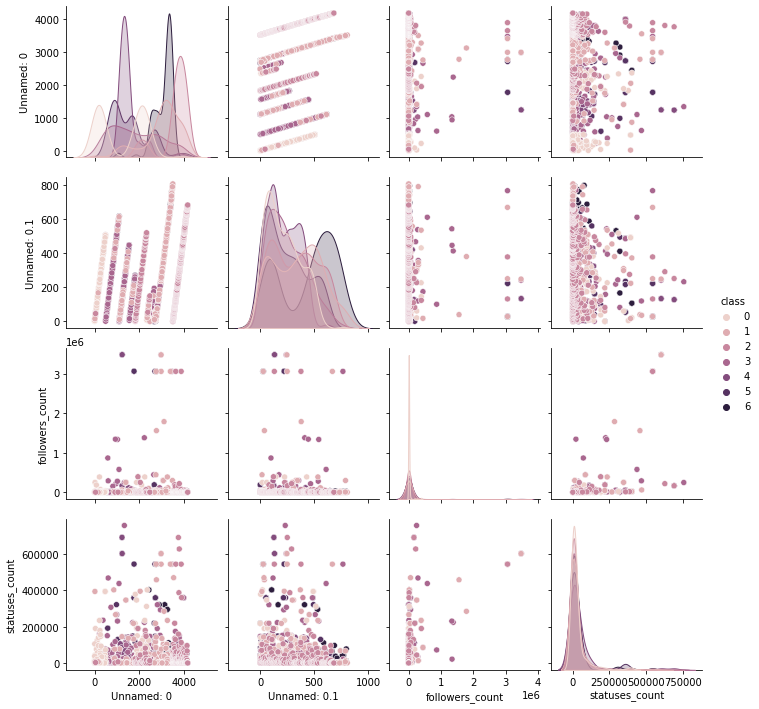

In [17]:
sns.pairplot(train_df, hue='class', size=2.5)

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_df['class'] = le.fit_transform(train_df['class'])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_df["clean_text"],
                                                  train_df["class"],
                                                  test_size=0.05,
                                                  shuffle=True,
                                                  stratify =train_df["class"] )

In [20]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
#import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True, )
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatibl

In [25]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:\n',confusion_matrix(y_val, y_predict))
print('The recall of the model is ',metrics.recall_score(y_val, y_predict, average='micro'))
baselog_accuracy = accuracy_score(y_val, y_predict)

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.82      0.78      0.80        18
           2       0.83      0.83      0.83        18
           3       0.69      0.50      0.58        18
           4       0.86      1.00      0.92        18
           5       0.82      1.00      0.90        18
           6       0.95      1.00      0.97        18

    accuracy                           0.83       125
   macro avg       0.82      0.83      0.82       125
weighted avg       0.82      0.83      0.82       125

Confusion Matrix:
 [[12  1  1  2  1  0  0]
 [ 0 14  1  1  0  2  0]
 [ 2  0 15  1  0  0  0]
 [ 1  2  1  9  2  2  1]
 [ 0  0  0  0 18  0  0]
 [ 0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0 18]]
The recall of the model is  0.832


In [26]:
# Import the libraries
from sklearn.datasets import make_classification

from imblearn.over_sampling import SVMSMOTE
lr_tfidf = SVMSMOTE(random_state = 101)

# Choosing a sample
X_oversample_svm, y_oversample_svm = make_classification(n_samples=10000, n_features=2,
                                                         n_redundant=0, n_clusters_per_class=1,
                                                         weights=[0.99], flip_y=0, random_state=101)

# Perform Logistic Regression
X_oversample_svm, y_oversample_svm = lr_tfidf.fit_resample(X_train_vectors_tfidf, y_train)
classifier_svm = LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
classifier_svm.fit(X_oversample_svm, y_oversample_svm)

#Predict y value for test dataset
y_predict = classifier_svm.predict(X_val_vectors_tfidf)
y_prob = classifier_svm.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val, y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
print('The recall of the model is ',metrics.recall_score(y_val, y_predict, average='micro'))
 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.82      0.78      0.80        18
           2       0.83      0.83      0.83        18
           3       0.69      0.50      0.58        18
           4       0.86      1.00      0.92        18
           5       0.82      1.00      0.90        18
           6       0.95      1.00      0.97        18

    accuracy                           0.83       125
   macro avg       0.82      0.83      0.82       125
weighted avg       0.82      0.83      0.82       125

Confusion Matrix: [[12  1  1  2  1  0  0]
 [ 0 14  1  1  0  2  0]
 [ 2  0 15  1  0  0  0]
 [ 1  2  1  9  2  2  1]
 [ 0  0  0  0 18  0  0]
 [ 0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0 18]]
The recall of the model is  0.832


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The recall of logistic regression is the highest with 83.2 % recall score.
This is the best performing model